# Explolation03
## 서론
### 세가지 주식 데이터를 가져와 시작가, 종가 등 다양한 것을 시계열 예측해보자.
_________________________________________________________________________________________________________________________________________________________
## 본론
### 1. 시계열 예측을 이용해 Open가 예측해보기
#### 1-1 시계열 데이터 준비

#### 1-2 각종 전처리 수행
##### * 결측치처리
##### * 로그 변환

#### 1-3 시계열 안정성 분석
##### * 정성적 그래프분석
##### * 정량적 Augmented Dicky-Fuller Test
##### * 시계열 분해
##### * Residual 안정성 확인

#### 1-4 학습, 테스트 데이터셋 분리

#### 1-5 적정 AIRIMA 모수 찾기

#### 1-6 ARIMA모델 훈련과 테스트
_________________________________________________________________________________________________________________________________________________________
### 2. 시계열 예측을 이용해 High가 예측해보기

#### 2-1 시계열 데이터 준비

#### 2-2 각종 전처리 수행

##### * 결측치처리
##### * 로그 변환
#### 2-3 시계열 안정성 분석

##### * 정성적 그래프분석
##### * 정량적 Augmented Dicky-Fuller Test
##### * 시계열 분해
##### * Residual 안정성 확인
#### 2-4 학습, 테스트 데이터셋 분리

#### 2-5 적정 AIRIMA 모수 찾기

#### 2-6 ARIMA모델 훈련과 테스트
_________________________________________________________________________________________________________________________________________________________
### 3. 시계열 예측을 이용해 Low가 예측해보기

#### 3-1 시계열 데이터 준비

#### 3-2 각종 전처리 수행

##### *결측치처리
##### *로그 변환
#### 3-3 시계열 안정성 분석

##### * 정성적 그래프분석
##### * 정량적 Augmented Dicky-Fuller Test
##### * 시계열 분해
##### * Residual 안정성 확인

#### 3-4 학습, 테스트 데이터셋 분리

#### 3-5 적정 AIRIMA 모수 찾기

#### 3-6 ARIMA모델 훈련과 테스트

## 결론

# Explolation03
## 서론
### 세가지 주식 데이터를 가져와 시작가, 종가 등 다양한 것을 시계열 예측해보자.
_________________________________________________________________________________________________________________________________________________________

## 본론
### 1. 시계열 예측을 이용해 Open가 예측해보기
#### 1-1 시계열 데이터 준비


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels

df= pd.read_csv("~/aiffel/005930.KS.csv",index_col='Date', parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


##### 필요한 데이터와 모듈을 다 받아왔다. 데이터를 보아하니 잘 받아와 졌다. 나는 Open가를 예측해보고싶으니 Open가를 변수에 저장을 해주는 작업을했다.

In [195]:
ts_open = df["Open"]
print(ts_open.head())
print(ts_open.shape)
type(ts_open)

Date
2020-05-18    47950.0
2020-05-19    50100.0
2020-05-20    50000.0
2020-05-21    50300.0
2020-05-22    49600.0
Name: Open, dtype: float64
(250,)


pandas.core.series.Series

##### 변수에 잘 저장되었다. 이제 이 데이터를 전처리 해보자.

#### 1-2 각종 전처리 수행
##### * 결측치처리

In [196]:
ts_open[ts_open.isna()]

Series([], Name: Open, dtype: float64)

일단 데이터에 대한 결측치를 확인해본결과 결측치는 없는 모습으로 나온다. 그래서 결측치 처리는 여기까지 해도 좋을것같다.  
이 데이터를 로그변환 시켜 p-value값을 낮춰줄 예정이다. 값이 너무 크기 때문에 p-value값이 높아질것같아서 이 데이터를 로그변환 시켜 p-value값을 낮춰줄 예정이다.

##### * 로그 변환

In [197]:
ts_open_log = np.log(ts_open)
ts_open_log

Date
2020-05-18    10.777914
2020-05-19    10.821776
2020-05-20    10.819778
2020-05-21    10.825760
2020-05-22    10.811746
                ...    
2021-05-12    11.299732
2021-05-13    11.275937
2021-05-14    11.277203
2021-05-17    11.299732
2021-05-18    11.284769
Name: Open, Length: 250, dtype: float64

##### numpy의 메서드를 이용해 로그변환해줬다. 결과를 보니 잘 변환된것같다. 앞서말한 p-value 값이 낮아진것은 정성적 그래프분석과, 정량적 테스트를 통해 알아보자.

#### 1-3 시계열 안정성 분석
##### * 정성적 그래프분석

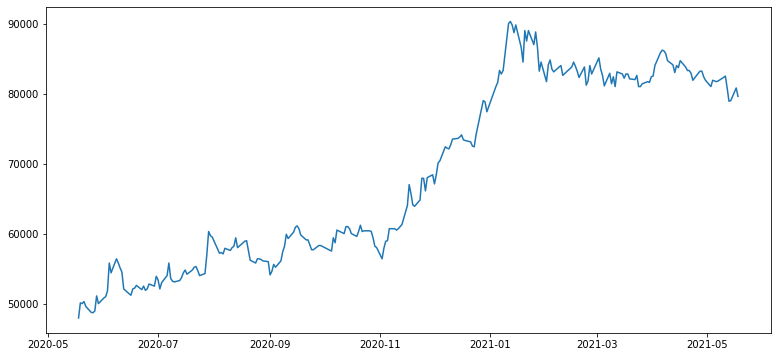

In [198]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts_open) # ts_open의 시각화 그래프

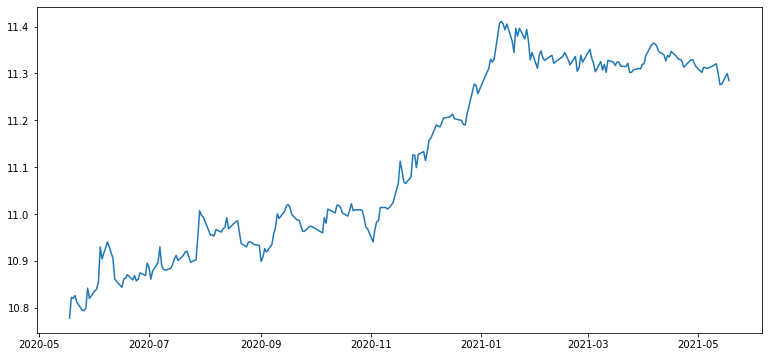

In [199]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts_open_log) # ts_open_log의 시각화 그래프

##### 일단 ts_open과 ts_open_log의 그래프를 시각화 한 결과이다. 눈으로 봐서 결측치는 보이지않는다.  
##### 이제 정상적그래프를 통해 데이터가 안정적인지 확인해보자.

In [200]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

##### 데이터의 정상적 그래프를 표현하기 위한 함수를 구현해보았다. 이 함수를 이용해 ts_open과 ts_open_log 데이터가 안정한지 확인해보자

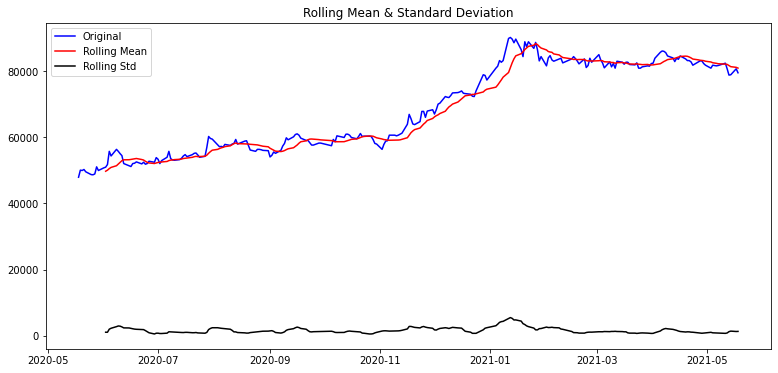

In [201]:
plot_rolling_statistics(ts_open, window=12)

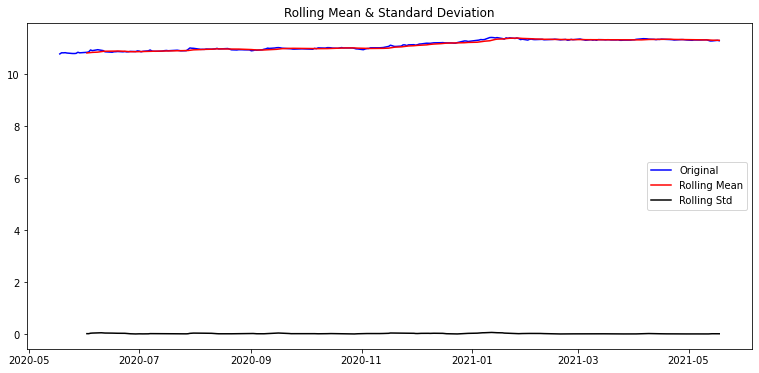

In [202]:
plot_rolling_statistics(ts_open_log, window=12)

#### 뭔가 로그 변환해준 데이터가 안전해 보인다. 실제로도 그런지 정량적 테스트를 통해 정확한 수치로 알아보자.

##### * 정량적 Augmented Dicky-Fuller Test

In [203]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    

##### 정량적 테스트를 구현하기위해 함수를 만들어줬다. 이제 이 함수를 이용해 정량적 테스트를 해보자.

In [204]:
augmented_dickey_fuller_test(ts_open)

Results of Dickey-Fuller Test:
Test Statistic                  -1.315813
p-value                          0.621907
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [205]:
augmented_dickey_fuller_test(ts_open_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.496329
p-value                          0.535327
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


##### 자 시각화한 결과를 보니 p-value값이 로그함수 변환해준게 더 낮았다. 이로써 로그함수로 변환시키면 p-value값이 낮아지는걸 알수가있다.  
##### 데이터를 안정하게 만들기 위해 로그함수로 변환 시키는것 말고 시계열 분해를 통해 p-value값을 더 낮춰보자.

##### * 시계열 분해

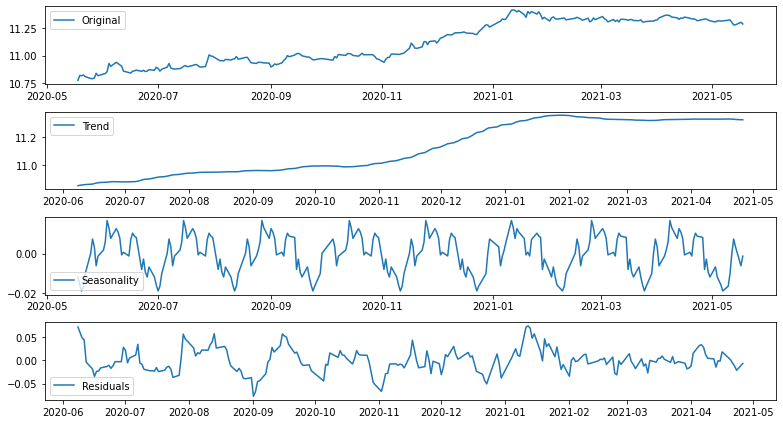

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_open_log, period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_open_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##### 자 데이터에 trand와 seasonallity를 빼줘 Residuals란걸 만들어줬는데 이 Residuals의 p-value값이 낮아진걸 정확하게 확인해보자

##### * Residual 안정성 확인

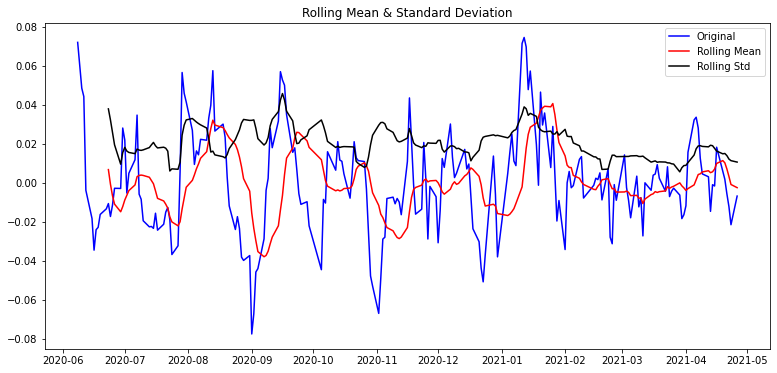

In [207]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

##### 그래프를 확인해보니 뭔가 줄어진 기분이다. 표를 보며 정확하게 안정성을 판별해보자.

In [208]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.045743e+00
p-value                        1.313207e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


##### p-value값이 정말 확연하게 낮아진걸 볼수있다.

#### 1-4 학습, 테스트 데이터셋 분리

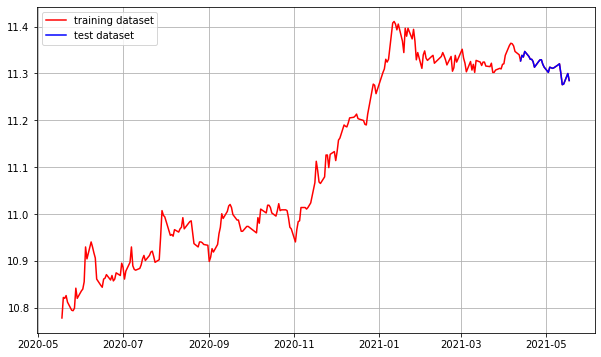

In [209]:
train_data, test_data = ts_open_log[:int(len(ts_open_log)*0.9)], ts_open_log[int(len(ts_open_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_open_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

##### 자 이제 이렇게 트레인 데이트와 테스트 데이터를 분리해봤으니 본격적으로 학습을 해보자.

#### 1-5 적정 AIRIMA 모수 찾기

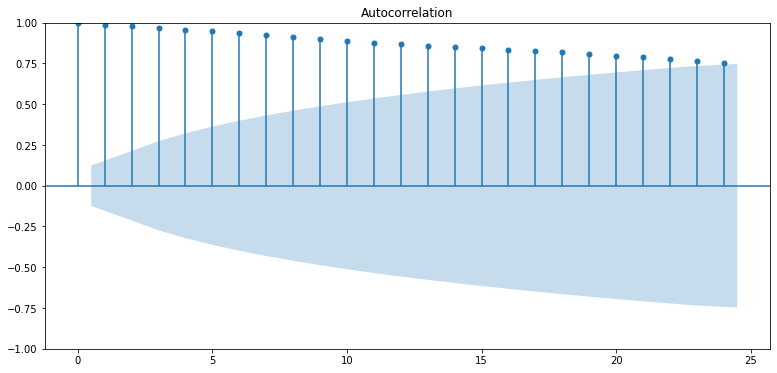

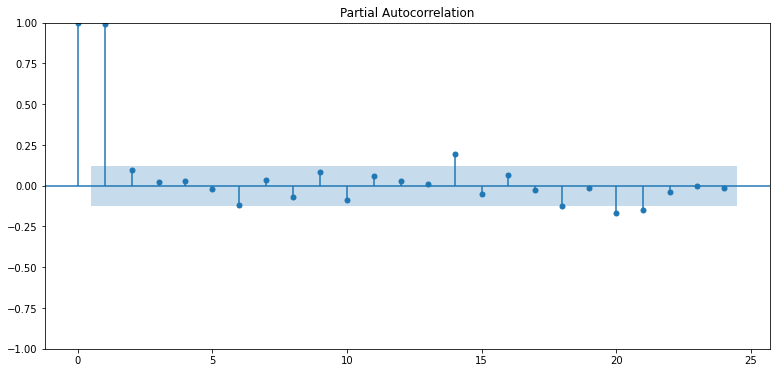

In [210]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_open_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_open_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

##### ARIMA모델을 테스트하기전에 ARIMA는 q,d,p 적정값을 찾아서 입력해 줘야한다.  
#####   q의 값은 첫번째 그래프를 보면 25라는 것을 알수있고 p의 값은 1이라는것을 알수있다.

Results of Dickey-Fuller Test:
Test Statistic                -1.672693e+01
p-value                        1.393437e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


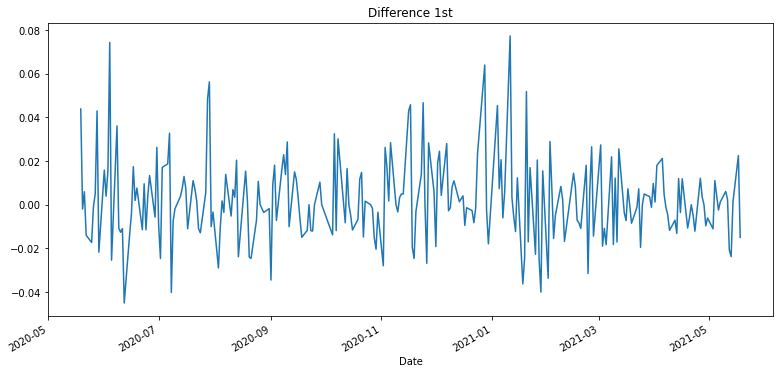

In [211]:
diff_1 = ts_open_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

##### d의 값은 위 표를 보면 알수있듯이 1이라는것을 알수있다.

#### 1-6 ARIMA모델 훈련과 테스트

In [212]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(25, 0, 1)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  225
Model:                ARIMA(25, 0, 1)   Log Likelihood                 573.204
Date:                Fri, 29 Apr 2022   AIC                          -1090.409
Time:                        14:14:55   BIC                           -994.758
Sample:                             0   HQIC                         -1051.804
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0683      0.145     76.473      0.000      10.785      11.352
ar.L1          0.6229      2.559      0.243      0.808      -4.392       5.637
ar.L2          0.3401      2.567      0.132      0.8

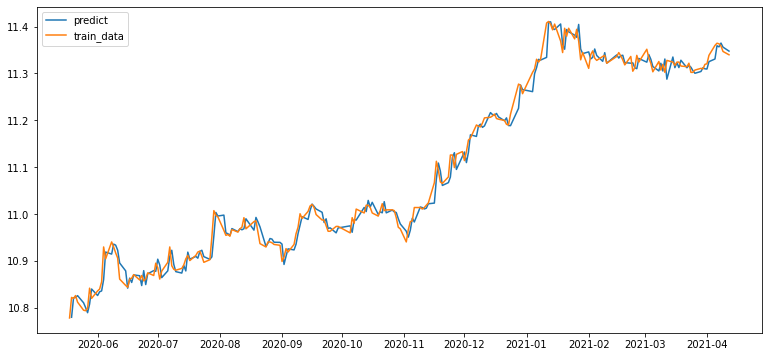

In [213]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

##### 학습은 잘 된것같다. 학습된 모델을 가지고 테스트 데이터를 예측 해보자.

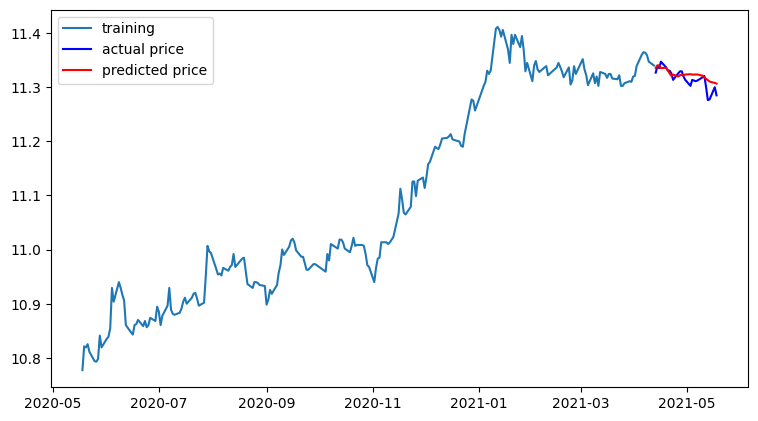

In [214]:
model = ARIMA(train_data, order=(25, 0, 1))  # p값을 25으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc.values, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

##### 나는 q의 값에 25를 넣어주었고 1차미분을 하면 너무 p-value값이 낮게나와 과적합이 일어날것같아 d의 값은 0을 넣어주었다. p의 값은 1을 넣어주었다.
##### 그 결과 아주 잘 나온것같다 이제 표를 보면서 정말 잘 결과가 나왔는지 확인해보자.

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


mse = mean_squared_error(np.exp(test_data), np.exp(fc.values))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc.values))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc.values)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc.values) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1227038.2189945395
MAE:  829.3115746054833
RMSE:  1107.7175718541887
MAPE: 1.02%


##### MAPE의 결과가 1.02%값으로 아주 잘 나온것같다. 이제 다른 종목을 예측해보자.

_________________________________________________________________________________________________________________________________________________________
### 2. 시계열 예측을 이용해 High가 예측해보기


2-1 시계열 데이터준비

In [216]:
df_kakao= pd.read_csv("~/aiffel/035720.KS.csv",index_col='Date', parse_dates=True)

df_kakao.head()
ts_kakao_high = df["High"]
print(df_kakao.head)
print(ts_kakao_high)

<bound method NDFrame.head of                 Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2021-04-29  120000.0  120500.0  115500.0  117000.0  116945.367188  3445462
2021-04-30  117000.0  117000.0  113000.0  113500.0  113447.000000  4405688
2021-05-03  112500.0  116000.0  110000.0  114500.0  114446.531250  2832622
2021-05-04  113500.0  116000.0  112000.0  115500.0  115446.070313  2228466
2021-05-06  115000.0  117500.0  113500.0  115000.0  114946.304688  3234424
...              ...       ...       ...       ...            ...      ...
2022-04-25   90400.0   91600.0   89600.0   89700.0   89700.000000  1511408
2022-04-26   89800.0   91700.0   89700.0   90200.0   90200.000000  1368258
2022-04-27   87600.0   88900.0   87600.0   88400.0   88400.000000  1390581
2022-04-28   89700.0   89800.0   88100.0   89300.0   89300.000000  1216554
2022-04-29   89300.0   89900.0   88700.0   89500.0   89500.000000   46

##### 이번엔 카카오 주식 데이터를 가져와봤다 카카오 주식에서는 High값을 예측해보자.

#### 2-2 각종 전처리 수행
##### * 결측치처리

In [217]:
ts_kakao_high[ts_kakao_high.isna()]
ts_kakao_high

Date
2020-05-18    49100.0
2020-05-19    50500.0
2020-05-20    50200.0
2020-05-21    50400.0
2020-05-22    49800.0
               ...   
2021-05-12    81200.0
2021-05-13    79600.0
2021-05-14    80300.0
2021-05-17    80900.0
2021-05-18    80000.0
Name: High, Length: 250, dtype: float64

##### 이번에도 결측치가 없으니 바로 로그변환을 해보자.

##### * 로그 변환

In [218]:
ts_kakao_log = np.log(ts_kakao_high)
print(ts_kakao_log.head())

Date
2020-05-18    10.801614
2020-05-19    10.829729
2020-05-20    10.823770
2020-05-21    10.827746
2020-05-22    10.815770
Name: High, dtype: float64


##### 로그 변환을 해줬으니 이제 시계열의 안정성을 분석해보자

#### 2-3 시계열 안정성 분석
##### * 정성적 그래프분석

1번 예제에서 데이터를 로그변환 시키면 p-value값이 낮아지는걸 확인했으니 다른 예제들은 log값만 가지고 안정성을 분석해보겠다.

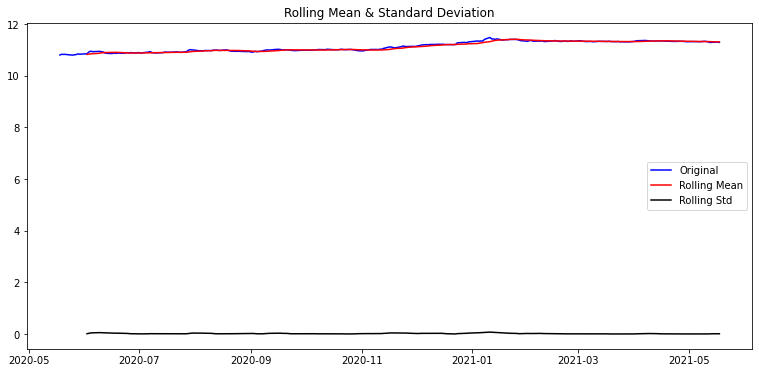

In [219]:
plot_rolling_statistics(ts_kakao_log, window=12)

##### * 정량적 Augmented Dicky-Fuller Test

In [220]:
augmented_dickey_fuller_test(ts_kakao_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.431495
p-value                          0.567087
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


##### * 시계열 분해

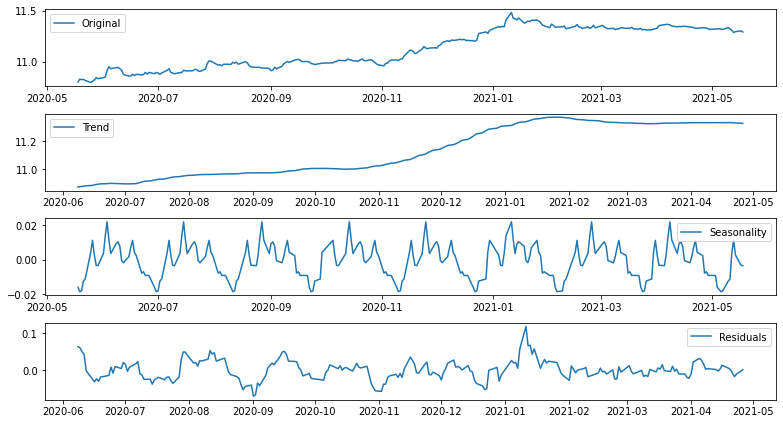

In [221]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_kakao = seasonal_decompose(ts_kakao_log,period=30)

trend_kakao = decomposition_kakao.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal_kakao = decomposition_kakao.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual_kakao = decomposition_kakao.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_kakao_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_kakao, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_kakao,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_kakao, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##### * Residual 안정성 확인

In [222]:
residual_kakao.dropna(inplace=True)
augmented_dickey_fuller_test(residual_kakao)

Results of Dickey-Fuller Test:
Test Statistic                -5.981075e+00
p-value                        1.837948e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


##### 역시 현저히 p-value 값이 낮아졌다. 아주 좋다.

#### 2-4 학습, 테스트 데이터셋 분리

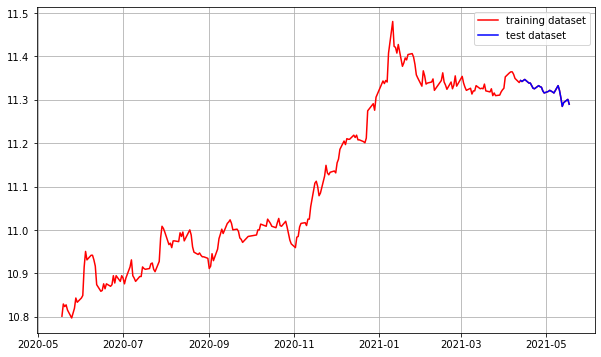

In [223]:
train_data, test_data = ts_kakao_log[:int(len(ts_kakao_log)*0.9)], ts_kakao_log[int(len(ts_kakao_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_kakao_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

잘 분리 되었다.

#### 2-5 적정 AIRIMA 모수 찾기

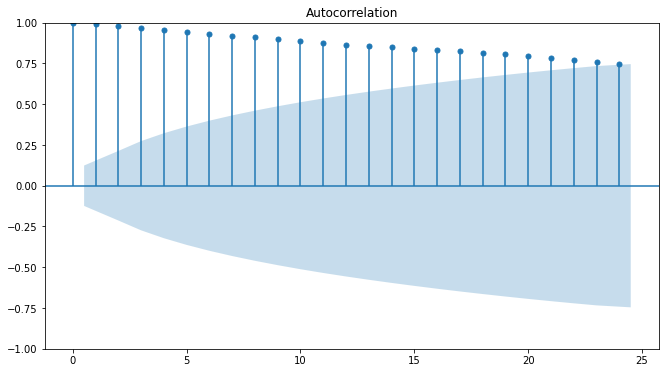

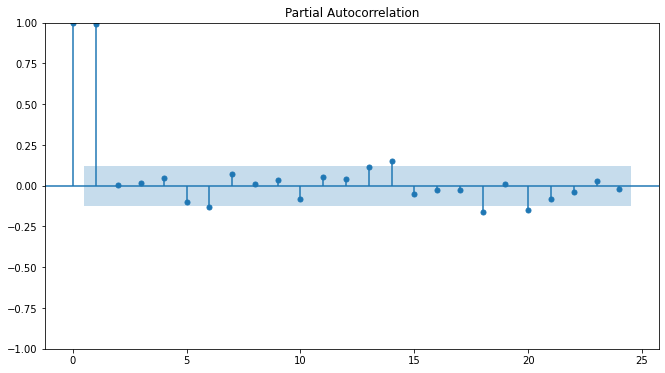

In [224]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_kakao_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_kakao_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.475670e+01
p-value                        2.437648e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


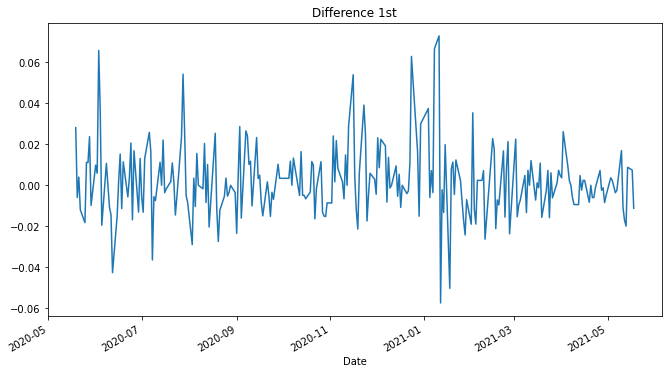

In [225]:
diff_1 = ts_kakao_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

##### p,d,q 값이 20 ,0, 1이 나왔다.한번 테스트해보자

#### 2-6 ARIMA모델 훈련과 테스트

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  225
Model:                ARIMA(20, 1, 0)   Log Likelihood                 590.420
Date:                Fri, 29 Apr 2022   AIC                          -1138.841
Time:                        14:15:00   BIC                          -1067.196
Sample:                             0   HQIC                         -1109.922
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1266      0.068      1.851      0.064      -0.007       0.261
ar.L2         -0.0508      0.078     -0.649      0.516      -0.204       0.103
ar.L3         -0.0534      0.075     -0.714      0.4

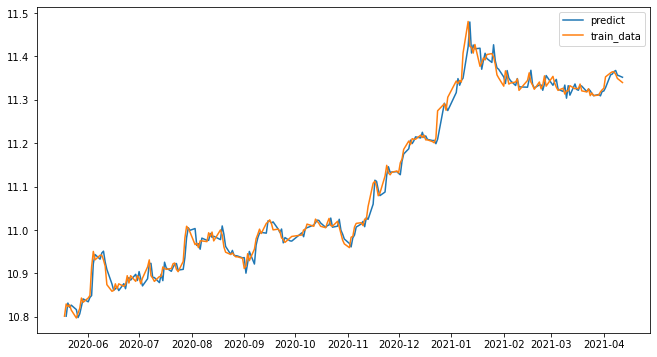

In [226]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(20, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

#### 잘 학습 되었다. 이제 결과를 보자.

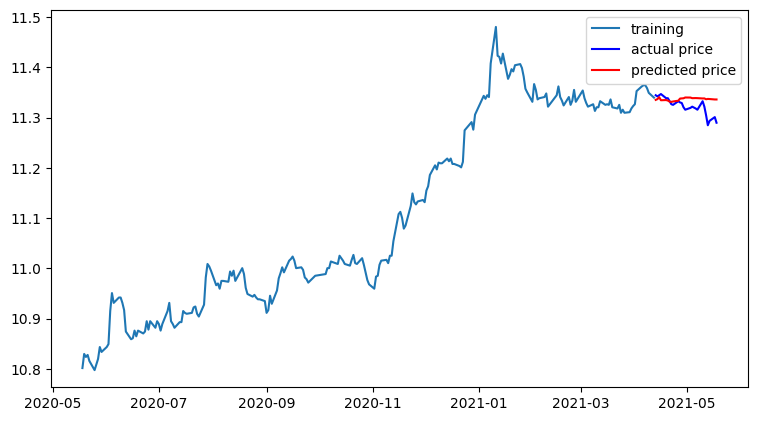

In [227]:
model = ARIMA(train_data, order=(20, 1, 0))  # p값을 20으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc.values, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [228]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc.values))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc.values))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc.values)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc.values) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3371990.1463469947
MAE:  1402.385808161545
RMSE:  1836.2979459627445
MAPE: 1.72%


##### 8.13%로 괜찮은결과인것같다.

_________________________________________________________________________________________________________________________________________________________
### 3. 시계열 예측을 이용해 Low가 예측해보기


3-1 시계열 데이터준비

In [229]:
df_apple= pd.read_csv("~/aiffel/AAPL.csv",index_col='Date', parse_dates=True)

df_apple.head()
ts_apple_low = df["Low"]
print(df_kakao.head)
print(ts_apple_low)

<bound method NDFrame.head of                 Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2021-04-29  120000.0  120500.0  115500.0  117000.0  116945.367188  3445462
2021-04-30  117000.0  117000.0  113000.0  113500.0  113447.000000  4405688
2021-05-03  112500.0  116000.0  110000.0  114500.0  114446.531250  2832622
2021-05-04  113500.0  116000.0  112000.0  115500.0  115446.070313  2228466
2021-05-06  115000.0  117500.0  113500.0  115000.0  114946.304688  3234424
...              ...       ...       ...       ...            ...      ...
2022-04-25   90400.0   91600.0   89600.0   89700.0   89700.000000  1511408
2022-04-26   89800.0   91700.0   89700.0   90200.0   90200.000000  1368258
2022-04-27   87600.0   88900.0   87600.0   88400.0   88400.000000  1390581
2022-04-28   89700.0   89800.0   88100.0   89300.0   89300.000000  1216554
2022-04-29   89300.0   89900.0   88700.0   89500.0   89500.000000   46

##### 이번엔 애플 주식을 가져와보았다. Low값을 예측해보자.

#### 3-2 각종 전처리 수행
##### * 결측치처리

In [230]:
ts_apple_low[ts_apple_low.isna()]

Series([], Name: Low, dtype: float64)

##### 이번에도 결측치는 확인이 안되는 모습이다. 로그 변환을 시켜보자.

##### * 로그 변환

In [231]:
ts_apple_log = np.log(ts_apple_low)
ts_apple_log

Date
2020-05-18    10.770588
2020-05-19    10.813760
2020-05-20    10.815770
2020-05-21    10.816774
2020-05-22    10.791379
                ...    
2021-05-12    11.287279
2021-05-13    11.269579
2021-05-14    11.275937
2021-05-17    11.279732
2021-05-18    11.278468
Name: Low, Length: 250, dtype: float64

##### 잘 변환된 모습을 보인다.

#### 3-3 시계열 안정성 분석
##### * 정성적 그래프분석

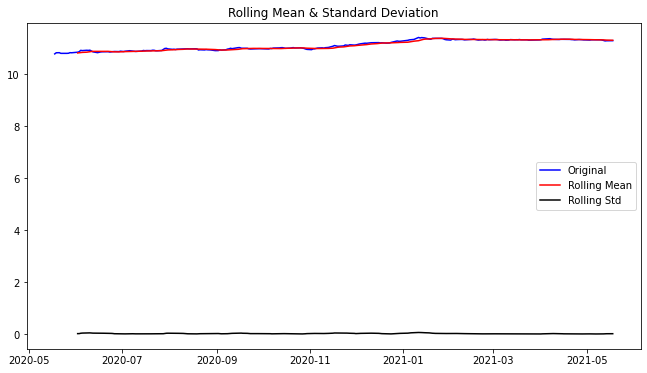

In [232]:
plot_rolling_statistics(ts_apple_log, window=12)

##### 그래프를 봤을때도 괜찮은 모습이다. 정량적테스트를 해보자.

##### * 정량적 Augmented Dicky-Fuller Test

In [233]:
augmented_dickey_fuller_test(ts_apple_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.190614
p-value                          0.677620
#Lags Used                       1.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


##### p-value값이 0.8로 좀 높게 나왔다. 시계열 분해를 통해 p-value값을 낮춰보자.

##### * 시계열 분해

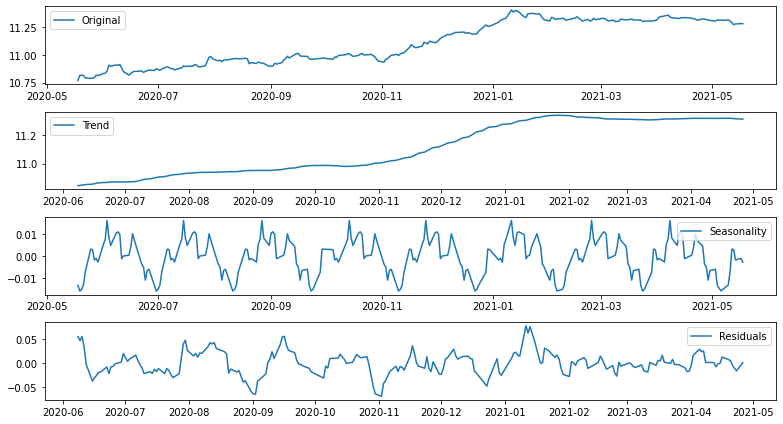

In [234]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_apple = seasonal_decompose(ts_apple_log,period=30)

trend_apple = decomposition_apple.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal_apple = decomposition_apple.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual_apple = decomposition_apple.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_apple_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_apple, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_apple,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_apple, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##### 잘 나눠졌다.

##### * Residual 안정성 확인

In [235]:
residual_apple.dropna(inplace=True)
augmented_dickey_fuller_test(residual_apple)

Results of Dickey-Fuller Test:
Test Statistic                -6.222090e+00
p-value                        5.193650e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


##### p-value값을 많이 낮춰줬다.

#### 3-4 학습, 테스트 데이터셋 분리

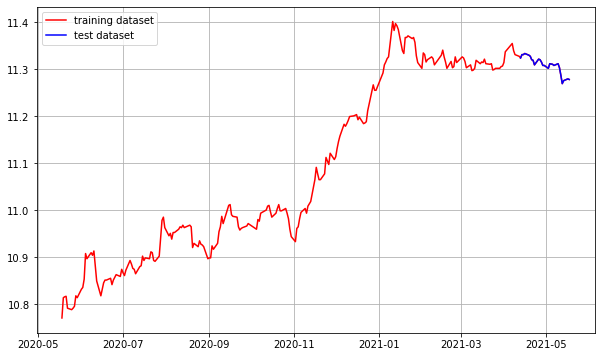

In [236]:
train_data_apple, test_data_apple= ts_apple_log[:int(len(ts_apple_log)*0.9)], ts_apple_log[int(len(ts_apple_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_apple_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_apple, c='b', label='test dataset')
plt.legend()

##### 잘 분리된 모습이다.

#### 3-5 적정 AIRIMA 모수 찾기

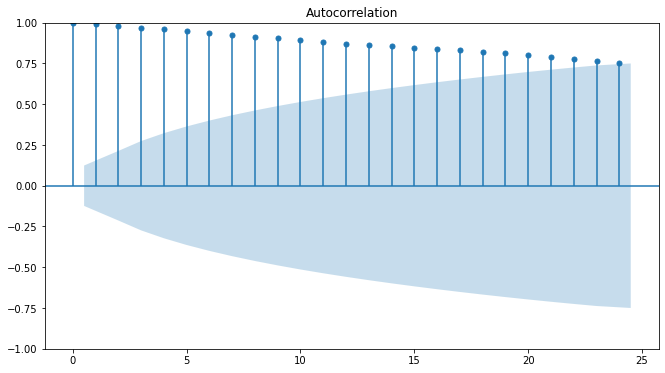

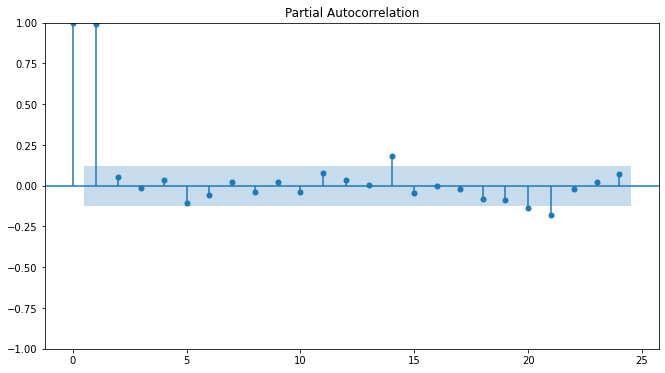

Results of Dickey-Fuller Test:
Test Statistic                -1.457943e+01
p-value                        4.493484e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


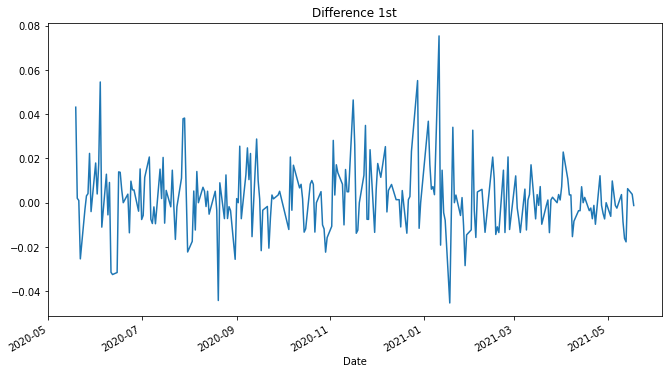

In [237]:
plot_acf(ts_apple_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_apple_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
diff_1 = ts_apple_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#### 3-6 ARIMA모델 훈련과 테스트

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                  225
Model:                ARIMA(20, 1, 0)   Log Likelihood                 613.511
Date:                Fri, 29 Apr 2022   AIC                          -1185.023
Time:                        14:15:03   BIC                          -1113.378
Sample:                             0   HQIC                         -1156.103
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1148      0.073      1.567      0.117      -0.029       0.258
ar.L2          0.0467      0.082      0.567      0.571      -0.115       0.208
ar.L3         -0.0925      0.074     -1.254      0.2

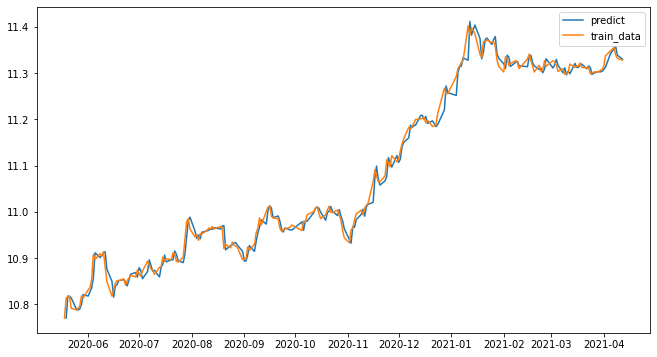

In [238]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model_apple = ARIMA(train_data_apple, order=(20, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m_apple = model_apple.fit() 

print(fitted_m_apple.summary())
fitted_m_apple = fitted_m_apple.predict()
fitted_m_apple = fitted_m_apple.drop(fitted_m_apple.index[0])
plt.plot(fitted_m_apple, label='predict')
plt.plot(train_data_apple, label='train_data')
plt.legend()

##### 잘 학습된 모습이다.

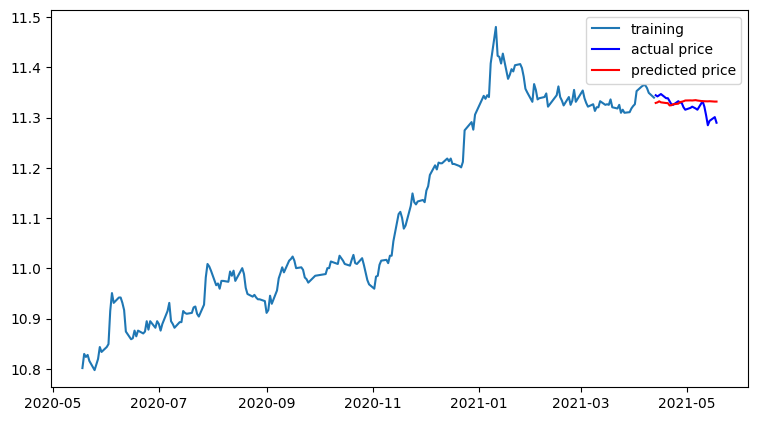

In [239]:
model_apple = ARIMA(train_data_apple, order=(20, 1, 0))  # p값을 20으로 테스트
fitted_m_apple = model_apple.fit() 
fc= fitted_m_apple.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc.values, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [240]:
mse = mean_squared_error(np.exp(test_data_apple), np.exp(fc.values))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_apple), np.exp(fc.values))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_apple), np.exp(fc.values)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc.values) - np.exp(test_data_apple))/np.abs(np.exp(test_data_apple)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5533872.375428257
MAE:  1782.9378387528018
RMSE:  2352.418409940769
MAPE: 2.22%


# 결론
## Explolation03에서 시계열을 나눠 학습시키는 모듈을 사용해봤다. 사용하면서 p,q,d 값을 알아보며 설정해보고, log 변환하면서 p-value값을 낮춰보고, mse, rmse, MAPE값을 낮춰보았다.
## 하루하루 이런 기본적인 머신러닝을 배우면서 성장하는 기분이다. 이것으로 explolation03과제를 마치겠다.